In [110]:
import seaborn as sns
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [111]:
# 많은 데이터 중에, tips를 가져오자
tips = sns.load_dataset("tips")
print(tips.shape)
tips.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


total_bill : 테이블의 전체 지불 금액
tip : 팁으로 낸 금액
sex: 계산한 손님의 성별
smoker : 손님 중 흡연자 포함 여부
day : 요일
time : 시간
size : 테이블 인원수

잠깐, 문자열 데이터가 있다 ! 숫자형 데이터로 바꿔주자

In [112]:
import pandas as pd
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time']) # dummies는 연속적인 숫자를 만들 수 있다. 0,1과 같은
tips.head()

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1


숫자 데이터로 고쳐졌다는 것을 알 수 있다. 이러한 작업을 원-핫 인코딩(One Hot Encoding)이라고 부른다.

In [113]:
tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'tip']]
tips.head()

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner,tip
0,16.99,2,0,1,0,1,0,0,0,1,0,1,1.01
1,10.34,3,1,0,0,1,0,0,0,1,0,1,1.66
2,21.01,3,1,0,0,1,0,0,0,1,0,1,3.50
3,23.68,2,1,0,0,1,0,0,0,1,0,1,3.31
4,24.59,4,0,1,0,1,0,0,0,1,0,1,3.61


특성이 하나 일 때는

y = wx + b

여러개 일 때는

y = w1x1 + w2x2 + w3x3 + w4x4 + w5x5 --

x정보가 12개 입니다. 따라서 같은 원리로 각 x값을 조정할 수 있도록 각각의 x에 각기 다른 w를 곱하고, 상수 b는 단 하나만 더해준다.

# 선형 회귀

회귀 : 연속된 실수값을 예측하는 문제

분류 : 사진을 입력받아 해당 사진이 강아지인지, 고양인지 맞히는 문제 분류



3차원까지만, 그래프로 시각화가 가능..

In [114]:
X = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
          'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']].values
y = tips['tip'].values

In [115]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(195, 12) (195,)
(49, 12) (49,)


In [116]:
import numpy as np
W = np.random.rand(12) #rand(행, 열)
b = np.random.rand()

In [117]:
W # 12개의 값을 가지고 있는 지 확인.

array([0.98642796, 0.34902551, 0.60600436, 0.1480101 , 0.49268586,
       0.10034783, 0.95429946, 0.11876627, 0.20150625, 0.87534469,
       0.85691254, 0.13207576])

In [118]:
b # 1개의 값을 가지고 있는 지 확인.

0.8027009940555733

In [119]:
def model(X, W, b):
    predictions = 0
    for i in range(12):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [120]:
# 손실함수 MSE를 사용해보자
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse # 두 값의 차이의 제곱의 평균

In [121]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

우리는 손실함수를 어떤 변수로 미분해야하나요?

1. 우리가 손실함수를 미분하는 이유는 최적의 매개변수, w와 b에 가까워지는 방향을 알기 위함이었다.

2. 특정 순간에 기울기가 양수라면 w를 더 작게 줄이고, 기울이가 음수라면, w를 더 크게 늘린다.

3. 즉, 우리는 W' = W - ng 공식을 활용해서 변수를 업데이트하는데, 이 때 기울기는 변수 업데이트의 방향을 결정하는 역활을 한다.

4. 따라서 손실함수는 언제나 내가 최적을 찾고자 하는 매개변수, 혹은 가중치에 대해 미분해야 한다.

5. 현재 모델에는 w1부터 w12까지 12개의 w와, 1개의 b가 있으므로 우리는 총 13 개의 변수에 대해 미분을 해야 한다.

In [122]:
#기울기 

def gradient(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [123]:
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

dW: [18859.88659135  2262.5264505    544.88141292   262.01074583
   322.71371913   484.17843962   193.30299553    53.95552523
   289.04394713   270.58969086   206.04641751   600.84574124]
db: 39.683220922117826


w1부터 w12까지 12개의 기울기 값과, b의 기울기를 효과적으로 구했다.

셋팅은 끝났으니, 본격적으로 학습시켜 보자

In [124]:
LEARNING_RATE = 0.0001

In [125]:
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 1.9660
Iteration 20 : Loss 1.9184
Iteration 30 : Loss 1.8920
Iteration 40 : Loss 1.8669
Iteration 50 : Loss 1.8430
Iteration 60 : Loss 1.8203
Iteration 70 : Loss 1.7986
Iteration 80 : Loss 1.7779
Iteration 90 : Loss 1.7582
Iteration 100 : Loss 1.7393
Iteration 110 : Loss 1.7213
Iteration 120 : Loss 1.7041
Iteration 130 : Loss 1.6877
Iteration 140 : Loss 1.6720
Iteration 150 : Loss 1.6569
Iteration 160 : Loss 1.6425
Iteration 170 : Loss 1.6286
Iteration 180 : Loss 1.6154
Iteration 190 : Loss 1.6027
Iteration 200 : Loss 1.5904
Iteration 210 : Loss 1.5787
Iteration 220 : Loss 1.5674
Iteration 230 : Loss 1.5566
Iteration 240 : Loss 1.5462
Iteration 250 : Loss 1.5361
Iteration 260 : Loss 1.5265
Iteration 270 : Loss 1.5171
Iteration 280 : Loss 1.5082
Iteration 290 : Loss 1.4995
Iteration 300 : Loss 1.4911
Iteration 310 : Loss 1.4830
Iteration 320 : Loss 1.4752
Iteration 330 : Loss 1.4677
Iteration 340 : Loss 1.4604
Iteration 350 : Loss 1.4533
Iteration 360 : Loss 1.4465
I

손실율이 점차 줄어드는 것을 볼 수 있다.

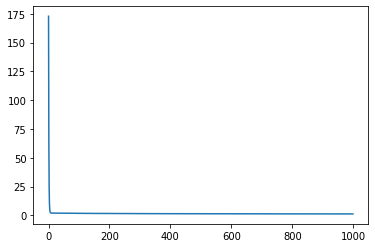

In [128]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [129]:
W, b

(array([ 0.08352223, -0.01632366,  0.17535388,  0.03460147,  0.0765504 ,
        -0.02757582,  0.47703035,  0.11765989,  0.29436583,  0.71680149,
         0.33922871,  0.10570047]), 0.7692204331894602)

In [131]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

0.7257728510704872

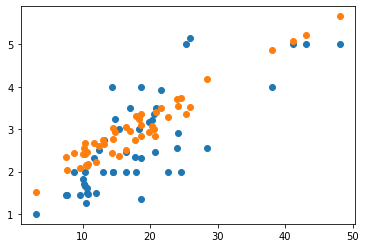

In [132]:
plt.scatter(X_test[:,0], y_test)
plt.scatter(X_test[:,0], prediction)
plt.show()

x축에는 total_bill을 y축에는 각각 tip값과 prediction 값을 표시했습니다.

In [133]:
tips = sns.load_dataset("tips")
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'])
tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'tip']]

In [134]:
X = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
          'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']].values
y = tips['tip'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [135]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()


In [136]:
model.fit(X_train, y_train)

LinearRegression()

In [137]:
predictions = model.predict(X_test)
predictions

array([2.91436632, 2.00292613, 3.96425583, 3.76380832, 2.14836306,
       2.67423448, 3.63934628, 2.29147245, 2.57207155, 2.45851225,
       2.90446763, 2.0573337 , 2.11817193, 2.35130838, 1.82976215,
       3.10830675, 2.95140176, 3.21602976, 2.56640892, 5.73957295,
       3.43490366, 3.22645102, 2.17139823, 1.94180002, 3.16394533,
       2.24547894, 2.14497574, 3.21025435, 3.20097595, 6.66803147,
       5.01111235, 1.57804024, 3.1909877 , 2.76652194, 2.98412862,
       3.85695724, 2.17008741, 5.46673999, 2.35586827, 2.99190732,
       2.03271177, 2.48465991, 3.44046814, 2.35532237, 1.92528104,
       0.87348926, 1.81911521, 3.04083954, 1.85436902])

In [140]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
mse

0.7033566017436105

0.7 흠...나쁘지 않네

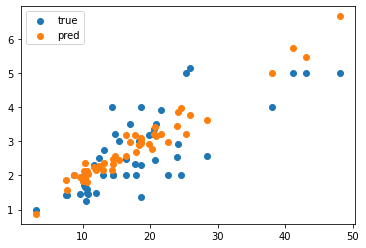

In [141]:
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], predictions, label="pred")
plt.legend() #지정했던 범례 텍스트들이 그래프를 그린 순서대로 출력된다.
plt.show()